In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import numpy
import scipy
import math
import matplotlib as mpl
import matplotlib.dates as mpd
import pylab as plt
import datetime as dtm
import pytz
import multiprocessing as mpp
import pickle
import sys
import os
#import socket
#import lmod
# lmod.load('system')
# lmod.load('texlive')
# lmod.
#
# TODO: phase out unreferenced hpc_lib calls...
import hpc_lib
#import hpc_reports
#
# def running_mean(X,n=10):
#     return (numpy.cumsum(numpy.insert(X,0,0))[n:] - numpy.cumsum(numpy.insert(X,0,0))[:-n])/n
# #

In [35]:
n_cpus = 4
#print('** epoch: {}'.format(mpd.get_epoch()))
if 'SLURM_CPUS_PER_TASK' in os.environ.keys():
    n_cpus = int(os.environ['SLURM_CPUS_PER_TASK'])
#
print(f'*** n_cpus: {n_cpus}')
#
SoMPIs = "baccus,ljinhy,shauld,willhies,zihuai,drehkopf,kasowski,rogala,engreitz,greicius,kornberg,mzeineh,giocomo,"
SoMPIs += "cmackall,dpwall,jyeatman,tttt,mzlin,mmonje,trc"

*** n_cpus: 12


In [53]:
N_report_len = 180
end_dtm = dtm.datetime(2023,11,22)
end_date = end_dtm.date()
start_date = end_date - dtm.timedelta(days=N_report_len)
print('*** dates: {} - {}'.format(start_date, end_date))
#delim_sacct='|'
delim_sacct='*'
#partition='serc'
partition=None
group=SoMPIs
s_user=None
verbose=0
# group='oneillm'
# group='edunham'
#s_user = 'labraha2'
#
sacct_h5_file = f'sacct_data/sacct_sherlock_p{str(partition).upper()}_g{str(group).upper()}_u{s_user}_{start_date.year:04}{start_date.month:02}{start_date.day:02}_{end_dtm.year:04}{end_dtm.month:02}{end_dtm.day:02}.h5'
sacct_h5_file = sacct_h5_file.replace(',', '-')
print(f'*** sacct_h5_file [{os.path.isfile(sacct_h5_file)}]: {sacct_h5_file}')

*** dates: 2023-05-26 - 2023-11-22
*** sacct_h5_file [False]: sacct_data/sacct_sherlock_pNONE_gBACCUS-LJINHY-SHAULD-WILLHIES-ZIHUAI-DREHKOPF-KASOWSKI-ROGALA-ENGREITZ-GREICIUS-KORNBERG-MZEINEH-GIOCOMO-CMACKALL-DPWALL-JYEATMAN-TTTT-MZLIN-MMONJE-TRC_uNone_20230526_20231122.h5


In [54]:
# NOTE: to get individual users, eg to get Eric's group usage:
#. sacct --allusers --user=labraha2 --start=2022-01-01 --end=2022-06-15
#
# NOTE: additional options can be passed in the more_options=[] arrary, or just as sacct_{option-name}={val}
#
if os.path.isfile(sacct_h5_file):
    print('*** Creating SACCT object from HDF5 {}'.format(sacct_h5_file))
    SACCT_obj = hpc_lib.SACCT_data_from_h5(sacct_h5_file, keep_raw_data=False, n_cpu=n_cpus)
    #
    
else:
    print('*** Fetching SACCT data directly')
    SACCT_obj = hpc_lib.SACCT_data_direct(group=group, partition=partition, start_date=str(start_date),
                                          n_cpu=n_cpus, verbose=verbose, delim=delim_sacct,
                                          end_date=str(end_date), keep_raw_data=False)
    # , sacct_user=s_user
    print(f'** writing HDF5: {sacct_h5_file}')
    SACCT_obj.write_hdf5(sacct_h5_file)
    #
#
print('** ', SACCT_obj.jobs_summary.dtype.names)

*** Fetching SACCT data directly
***  2023-05-26 00:00:00+00:00 <class 'datetime.datetime'> 2023-11-22 00:00:00+00:00 <class 'datetime.datetime'>
*** DEBUG: Now execute load_sacct_data(); options_str= --group=baccus,ljinhy,shauld,willhies,zihuai,drehkopf,kasowski,rogala,engreitz,greicius,kornberg,mzeineh,giocomo,cmackall,dpwall,jyeatman,tttt,mzlin,mmonje,trc  --delimiter="*" 
*** DEBUG: load_sacct_data() executed. Compute calc_jobs_summary()
*** DEBUG: data stuff:  2010708 (numpy.record, [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('ReqMem', '<f8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'O'), ('Suspended', 'O'), ('ReqTRES', 'O'), ('AllocTRES', 'O'), ('MaxRSS', '<f8'), ('

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3309: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3309: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3131: RuntimeWarning: All-NaN slice encountered
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3131: RuntimeWarning: invalid value encountered in cast
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3131: RuntimeWarning: All-NaN slice encountered
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3131: RuntimeWarning: invalid value encountered in cast
  ('NTasks',    'NTasks', l

** writing HDF5: sacct_data/sacct_sherlock_pNONE_gBACCUS-LJINHY-SHAULD-WILLHIES-ZIHUAI-DREHKOPF-KASOWSKI-ROGALA-ENGREITZ-GREICIUS-KORNBERG-MZEINEH-GIOCOMO-CMACKALL-DPWALL-JYEATMAN-TTTT-MZLIN-MMONJE-TRC_uNone_20230526_20231122.h5
*** DEBUG: updating column [index], type=<i8
*** DEBUG: updating column [User], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Group], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [GID], type=('|S6', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Account], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [JobID], type=('|S50', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [JobIDRaw], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Partition], type=('|S33', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [State], type=('|S19', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Timelimit], type=<f8
*** DEBUG: updating column [NCPUS], type=<i8
*** DEB

In [55]:
# SP=hpc_lib.SH_PART_obj()

# print(f'*** Cols: {SACCT_obj.jobs_summary.dtype.names}')
# print(f'*** CPUs: {SP.get_total_cpus(partitions="serc")}')
# print(f'*** GPUs: {SP.get_total_gpus(partitions="serc")}')

# n_cpus_serc = SP.get_total_cpus(partitions='serc')
# n_gpus_serc = SP.get_total_gpus(partitions='serc')
# #
# print(f'** n_cpus: {n_cpus_serc}, n_gpus: {n_gpus_serc}')
# #
# print('*** ', SP.SP)

In [56]:

print('** ', SACCT_obj.jobs_summary.dtype)
print('** ', type(SACCT_obj.jobs_summary['User'][0]))
#
# my_ary = numpy.array(len(SACCT_obj.jobs_summary), dtype=SACCT_obj.jobs_summary.dtype)
# print('** ', my_ary.dtype)
#
for cl,tp in SACCT_obj.jobs_summary.dtype.descr:
    print('** ', cl, tp)
    
#
print('** ** ', SACCT_obj.jobs_summary['Group'].astype(str)[0])


**  [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('ReqMem', '<f8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'O'), ('Suspended', 'O'), ('ReqTRES', 'O'), ('AllocTRES', 'O'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDiskRead', '<f8'), ('JobID_parent', 'O'), ('NGPUs', '<i8')]
**  <class 'str'>
**  index <i8
**  User |O
**  Group |O
**  GID |O
**  Account |O
**  JobID |O
**  JobIDRaw |O
**  Partition |O
**  State |O
**  Timelimit <f8
**  NCPUS <i8
**  ReqMem <f8
**  NNodes <i8
**  Submit <f8
**  Eligible <f8
**  Start <f8
**  End <f8
**  Elapsed <f8
**  SystemC

*** DEBUG t_now: 19683.447299855034, t_max: 19683.443703703702


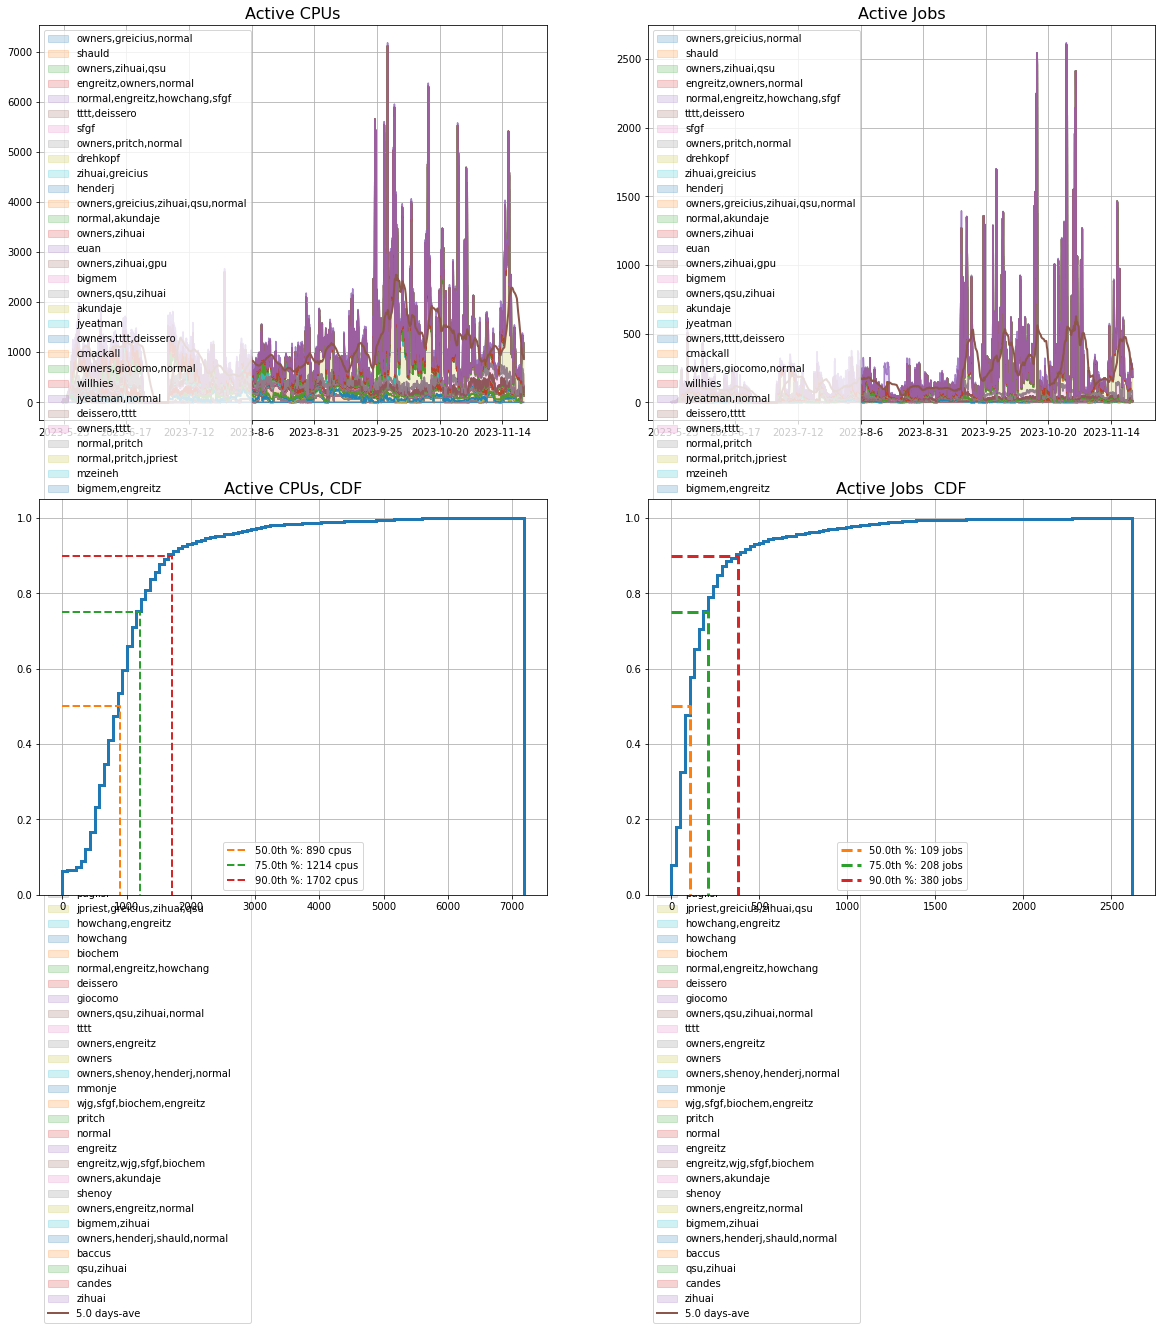

In [57]:
rep_cpu_lc = SACCT_obj.report_activecpus_jobs_layercake_and_CDFs(group_by='Partition')
#
# plot total CPUs in partition. Also, subtract CPUs associated with GPUs. For now, this is just
#. something we know. we will need to work harder to get it from data.
ax = rep_cpu_lc.axes[0]
ln = ax.lines[0]
#
# x_max_cpus = numpy.array([ax.lines[0].get_xdata()[0], ax.lines[0].get_xdata()[-1]])
# ax.plot( x_max_cpus, numpy.ones(2)*n_cpus_serc, ls='--', lw=3.,
#        color='r', label='+GPUs')

# ax.plot( x_max_cpus, numpy.ones(2)*n_cpus_serc-(10*128 + 2*24), ls='--', lw=3.,
#        color='m', label='CPUs')
# #
# ax.plot( x_max_cpus, numpy.ones(2)*n_cpus_serc-(10*128 + 2*24 + 96*32), ls='--', lw=3.,
#        color='c', label='CPUs (old SERC)')

ax.legend(loc='upper left')

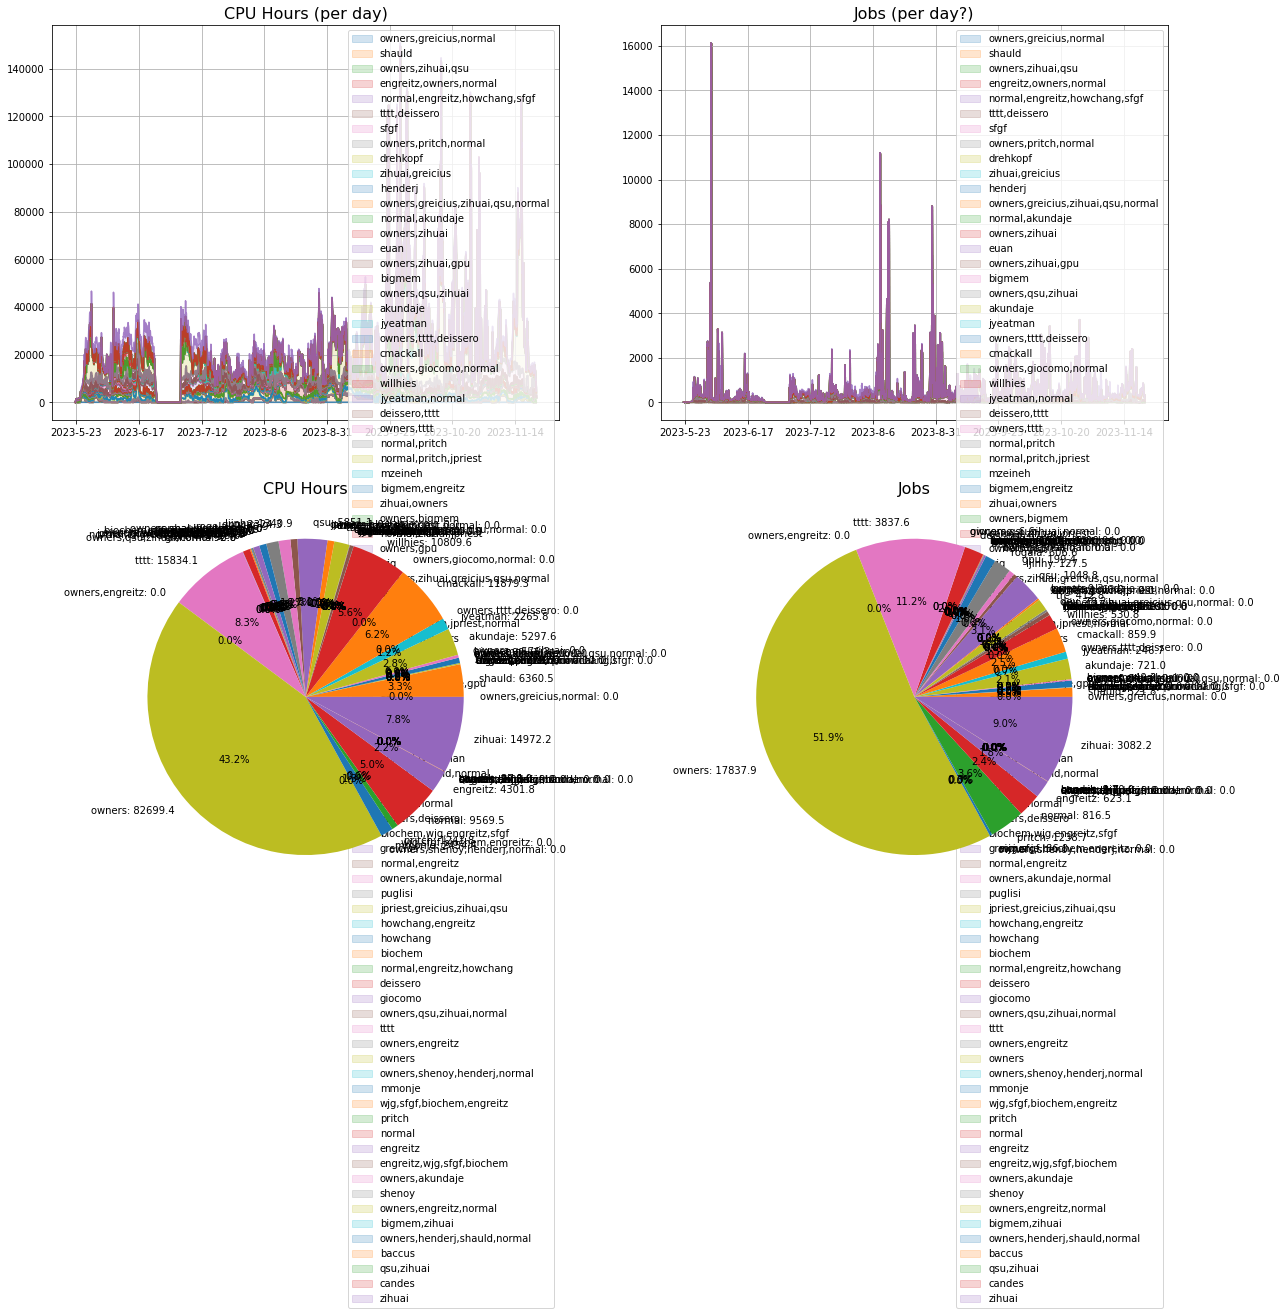

In [58]:
fg_cpuhlc = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='Partition', autopct='%1.1f%%')

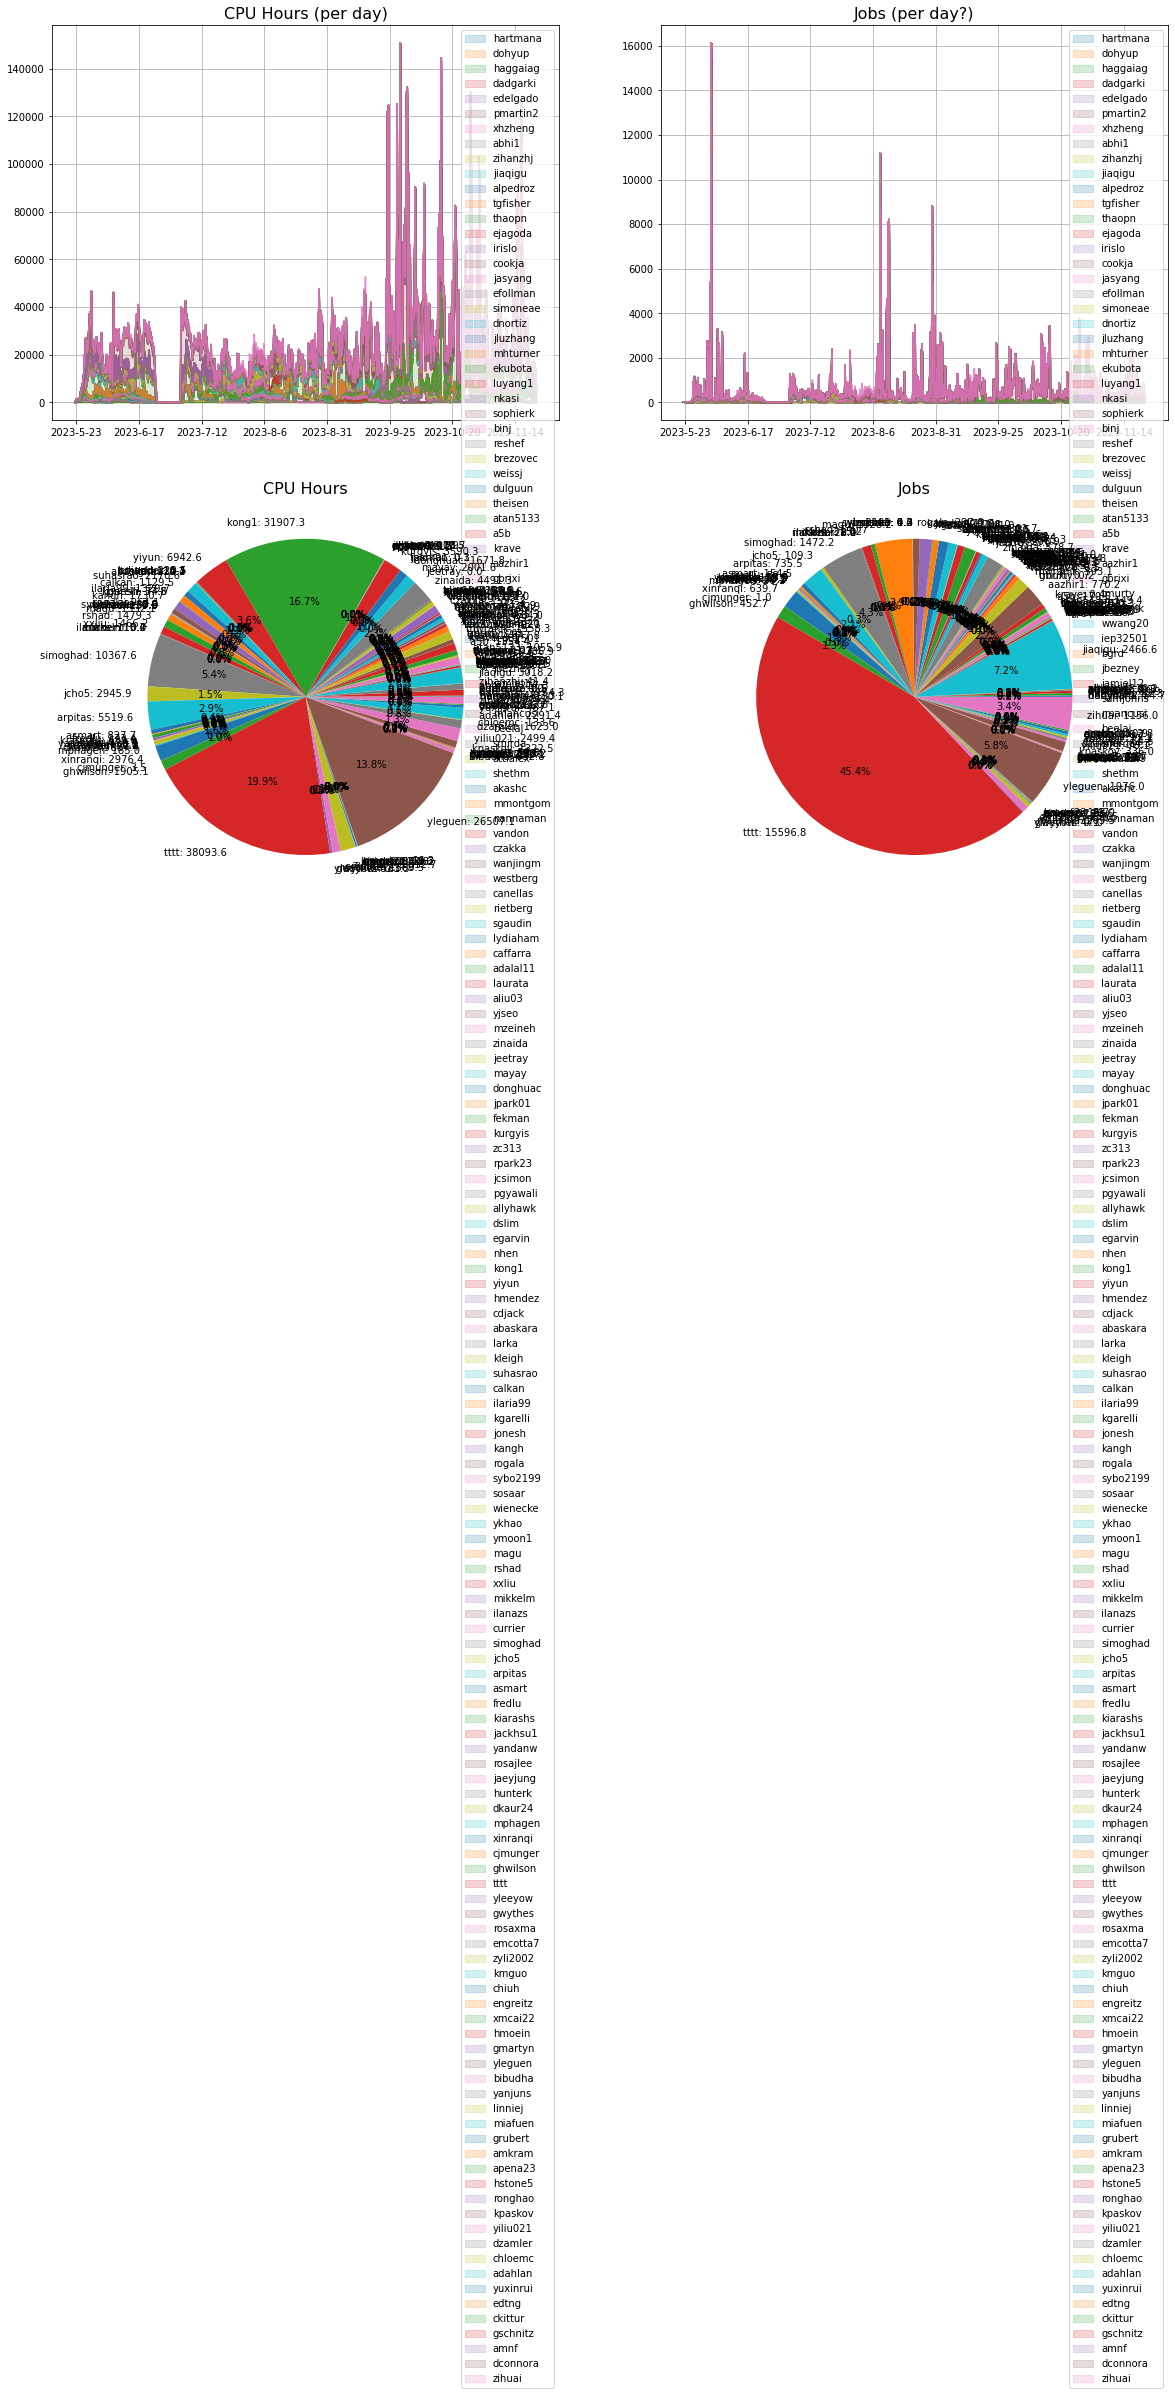

In [59]:
fg_cpuhl_u = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='User', autopct='%1.1f%%')

*** DEBUG t_now: 19683.450341696203, t_max: 19683.443703703702


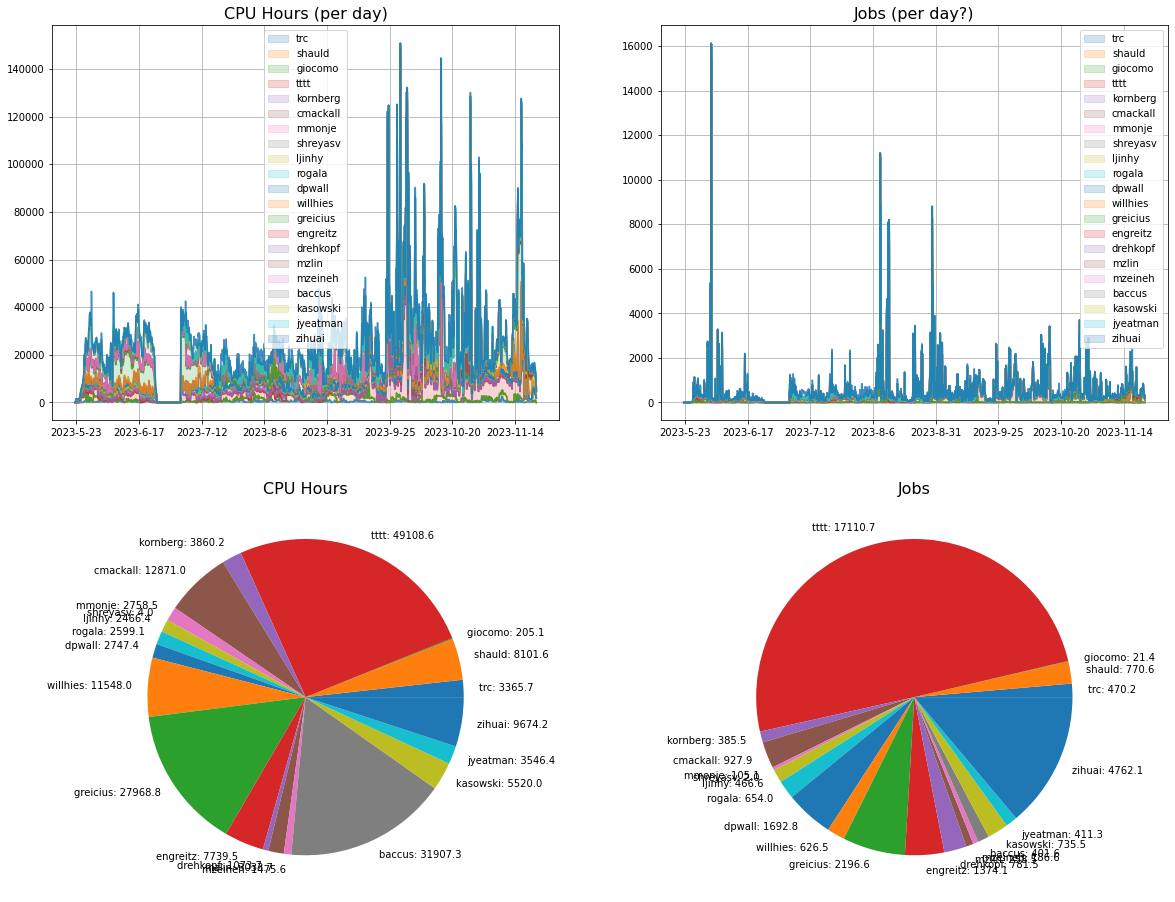

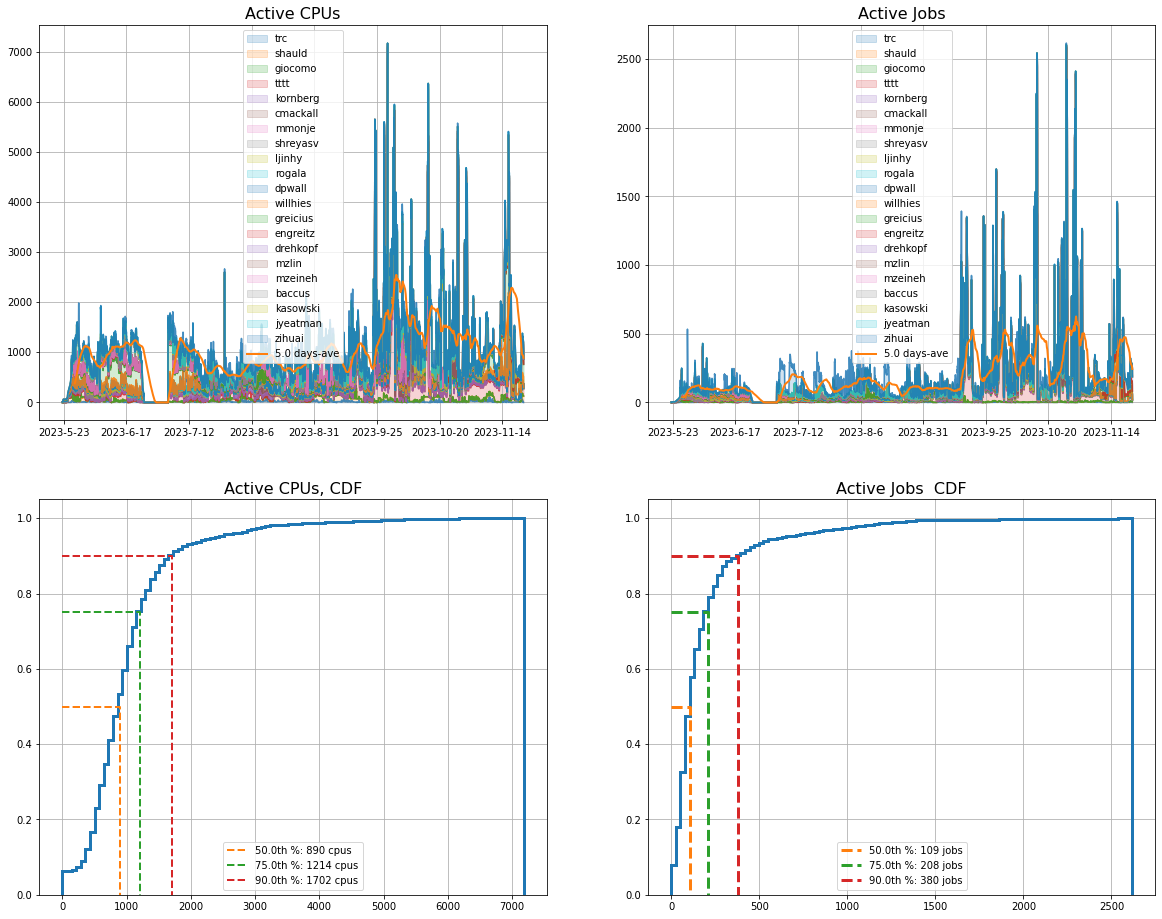

In [60]:
fg_cpuhl_acct = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='Account')
fg_cpu_lc_acct = SACCT_obj.report_activecpus_jobs_layercake_and_CDFs(group_by='Account')

### User stat table
- Generate a table of summary user stats

In [61]:
#
cpuh_pie_user = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed']*SACCT_obj['NCPUS'],
                                       slice_data=SACCT_obj['User'])
jobs_pie_user = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed'], slice_data=SACCT_obj['User'])
#

*** CPU-hours: 
Name;cpu-hours;job-hours;n_jobs;last_job_start;Group;Accounts;Partitions
tttt;38093.60413194445;15596.755081018518;108544;2023-11-22 10:16:39+00:00;tttt;tttt;deissero,deissero,tttt,dev,normal,owners,owners,deissero,owners,tttt,owners,tttt,deissero,tttt,tttt,deissero
kong1;31907.25167824074;401.6286458333334;1592;2023-11-05 21:36:58+00:00;baccus;baccus;baccus,bigmem,dev,gpu,normal,owners
yleguen;26507.05972222222;1976.044409722222;13368;2023-11-22 10:20:38+00:00;greicius;greicius;bigmem,bigmem,zihuai,dev,greicius,jpriest,greicius,zihuai,qsu,normal,normal,zihuai,jpriest,owners,owners,greicius,zihuai,qsu,normal,owners,zihuai,greicius,qsu,normal,qsu,zihuai,zihuai,greicius
simoghad;10367.615000000002;1472.2170023148149;244004;2023-11-21 20:40:57+00:00;tttt;tttt;dev,normal,owners,owners,tttt,tttt
yiyun;6942.617256944444;251.03593750000002;5457;2023-11-21 04:44:56+00:00;cmackall;cmackall;bigmem,cmackall,normal,owners
arpitas;5519.636805555556;735.5244328703703;10082;2023-11-21

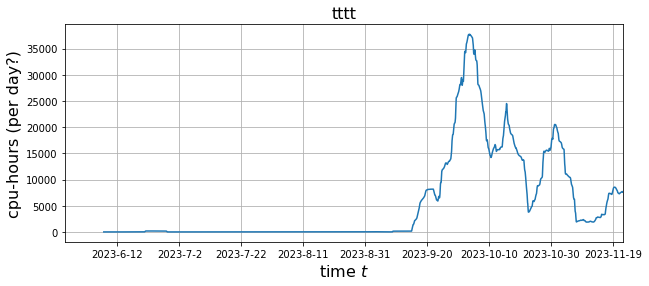

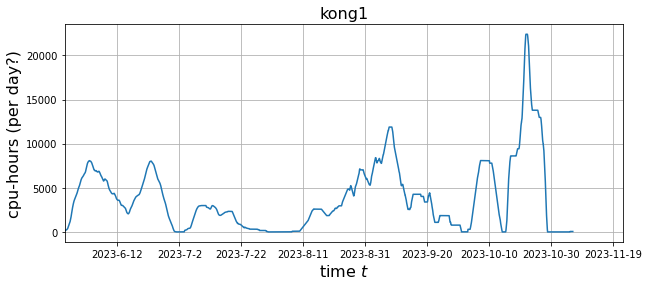

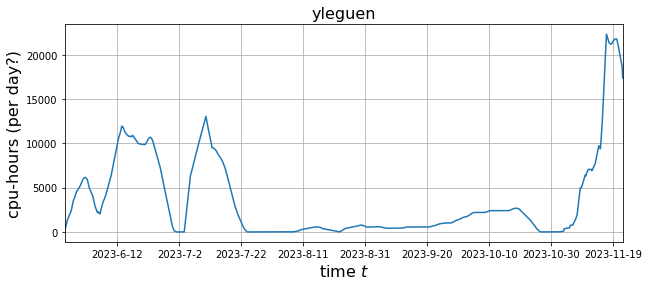

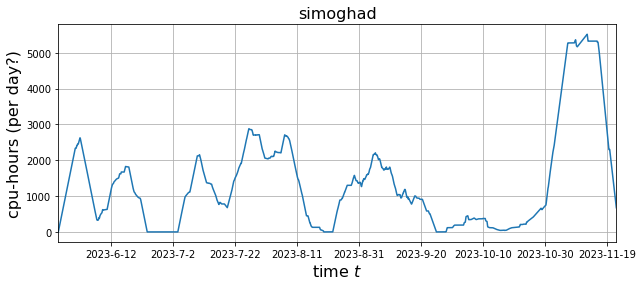

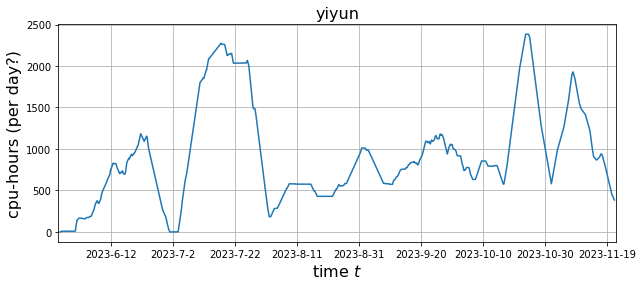

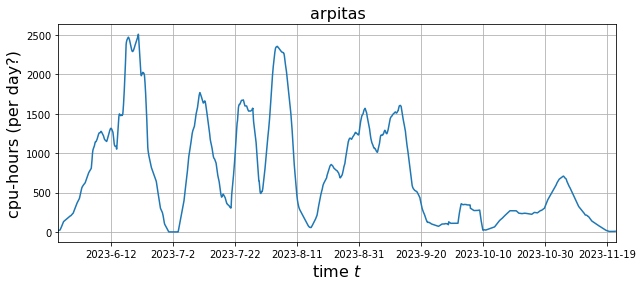

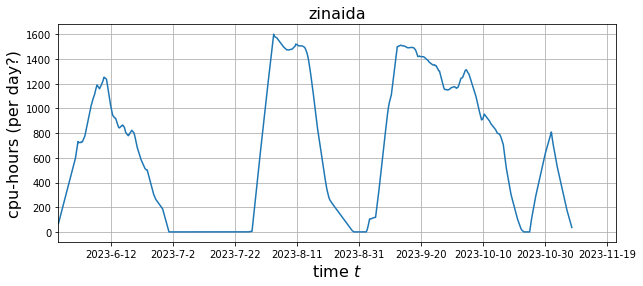

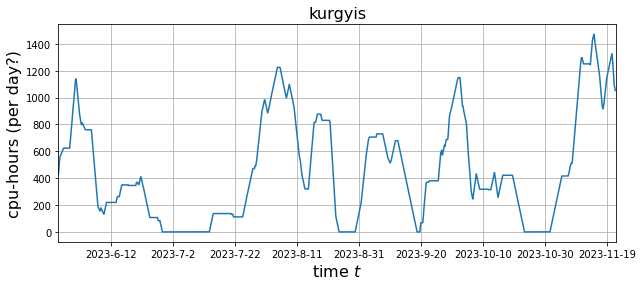

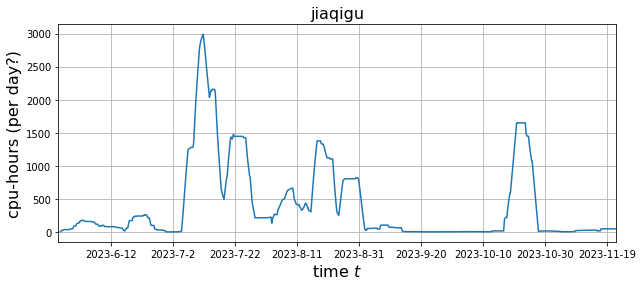

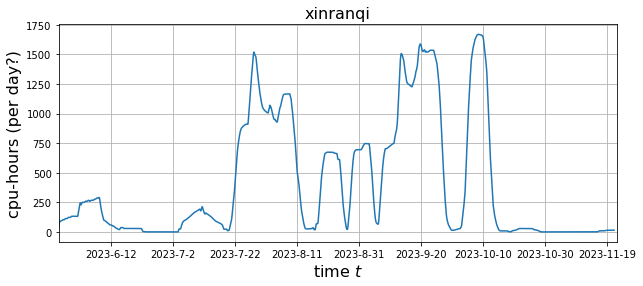

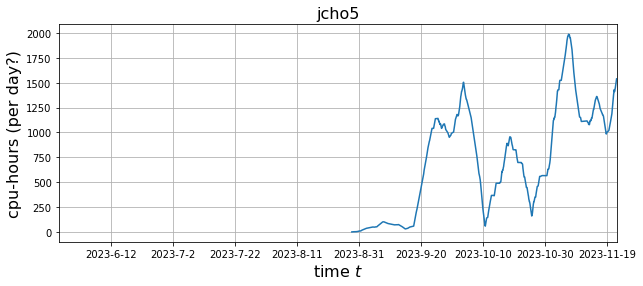

In [62]:
# This will be way too big to produce in notebooks, practically speaking at least..
# or maybe not, but we should do it last?
t0 = mpd.date2num(start_date)
t1 = mpd.date2num(end_date)
delim = chr(9)
delim = ';'
print('*** CPU-hours: ')
#print('**  Name,   cpu-hours,    job-hours,  last_job_start', )
print(delim.join(['Name', 'cpu-hours', 'job-hours', 'n_jobs', 'last_job_start', 'Group', 'Accounts', 'Partitions']))
jindex = {nm:k for k,nm in enumerate(jobs_pie_user['name'].astype(str))}
#print('** jindex: ', jindex)
for k, (nm,n) in enumerate(cpuh_pie_user[numpy.argsort(cpuh_pie_user['value'])[::-1]] ):
    if k>10: break
    #
    ix = SACCT_obj['User'].astype(type(nm)) == nm
    fg = plt.figure(figsize=(10,4))
    ax = fg.add_subplot(1,1,1)
    z = SACCT_obj.get_cpu_hours(jobs_summary=SACCT_obj[ix])
    ax.plot(z['time'], z['cpu_hours'], ls='-', marker='')
    ax.set_xlim(t0,t1)
    ax.grid()
    ax.set_xlabel('time $t$', size=16)
    ax.set_ylabel('cpu-hours (per day?)', size=16)
    #
    if isinstance(nm,bytes):
        nm = nm.decode()
    #
    ax.set_title(nm, size=16)
    #
    fg.canvas.draw()
    dt_epoch = hpc_lib.compute_mpd_epoch_dt(z['time'][0])
    lbls = [hpc_lib.simple_date_string(mpd.num2date(x + dt_epoch)) for x in ax.get_xticks()]
#     lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_value()))) + dt_epoch) )
#               for s in ax.get_xticklabels()]

    #
    #ax.set_xticklabels(lbls)
    # This should get rid of the FixedLocator warning? But I'm not sure it will...
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(lbls)
    #
    rw_vals = [nm, n, jobs_pie_user['value'][jindex[nm]], numpy.sum(ix).astype(int),\
          (None if numpy.isnan(numpy.nanmax(numpy.nanmax(SACCT_obj['Start'][ix]))) else mpd.num2date(numpy.nanmax(SACCT_obj['Start'][ix])) ),\
           SACCT_obj['Group'][ix].astype(str)[0],\
                ','.join(numpy.unique(SACCT_obj['Account'][ix]).astype(str)),\
                ','.join(numpy.unique(SACCT_obj['Partition'][ix]).astype(str))]
    print(delim.join([str(x) for x in rw_vals]))
#     print(f"{nm.decode()}, {n}, {jobs_pie_user['value'][jindex[nm]]},\
#           {mpd.num2date(max(SACCT_obj['Start'][ix]))}, {SACCT_obj['Group'][ix].astype(str)[0]},\
#                 {delim.join(numpy.unique(SACCT_obj['Account'][ix]).astype(str))},\
#                 {delim.join(numpy.unique(SACCT_obj['Partition'][ix]).astype(str))}\
#                 ")
#
# print('*** Jobs-time:')
# print('**  Name,   n_jobs,   last_job_start')
# for nm,n in jobs_pie_user[numpy.argsort(jobs_pie_user['value'])[::-1]]:
#     ix = SACCT_obj['User'].astype(type(nm)) == nm
#     print(f"**  {nm.decode()}, {n}, {mpd.num2date(max(SACCT_obj['Start'][ix]))}, {SACCT_obj['Group'][ix][0]}")

In [63]:
print('** ', ax)
print('** ', ax.get_xticklabels()[0].get_position()[0])
print('** ', ax.get_xticks())

**  Axes(0.125,0.125;0.775x0.755)
**  19500.0
**  [19500. 19520. 19540. 19560. 19580. 19600. 19620. 19640. 19660. 19680.
 19700.]


In [64]:
# Now, let's get a some reports for specific users, namely Lauren and Eric's former student(s) to estimate
#. requirements for their successors.
#
# Also, TODO: layer cake for active_cpus ?
# NOTE: for up and coming "how busy is the queue?" reporting, something like this:
# squeue -p serc --Format=jobid,jobarrayid,partition,username,state,timeused,timeleft,allocnodes,numnodes,numcpus


In [65]:
cpuh_jobs = SACCT_obj.get_cpu_hours(bin_size=1., n_points=5000)

In [66]:
cpuh_layers = SACCT_obj.get_cpu_hours_layer_cake(bin_size=1.)

***  [('time', '>f8'), ('owners,greicius,normal', '>f8'), ('shauld', '>f8'), ('owners,zihuai,qsu', '>f8'), ('engreitz,owners,normal', '>f8'), ('normal,engreitz,howchang,sfgf', '>f8'), ('tttt,deissero', '>f8'), ('sfgf', '>f8'), ('owners,pritch,normal', '>f8'), ('drehkopf', '>f8'), ('zihuai,greicius', '>f8'), ('henderj', '>f8'), ('owners,greicius,zihuai,qsu,normal', '>f8'), ('normal,akundaje', '>f8'), ('owners,zihuai', '>f8'), ('euan', '>f8'), ('owners,zihuai,gpu', '>f8'), ('bigmem', '>f8'), ('owners,qsu,zihuai', '>f8'), ('akundaje', '>f8'), ('jyeatman', '>f8'), ('owners,tttt,deissero', '>f8'), ('cmackall', '>f8'), ('owners,giocomo,normal', '>f8'), ('willhies', '>f8'), ('jyeatman,normal', '>f8'), ('deissero,tttt', '>f8'), ('owners,tttt', '>f8'), ('normal,pritch', '>f8'), ('normal,pritch,jpriest', '>f8'), ('mzeineh', '>f8'), ('bigmem,engreitz', '>f8'), ('zihuai,owners', '>f8'), ('owners,bigmem', '>f8'), ('normal,zihuai,jpriest', '>f8'), ('owners,gpu', '>f8'), ('wjg', '>f8'), ('owners,zihu

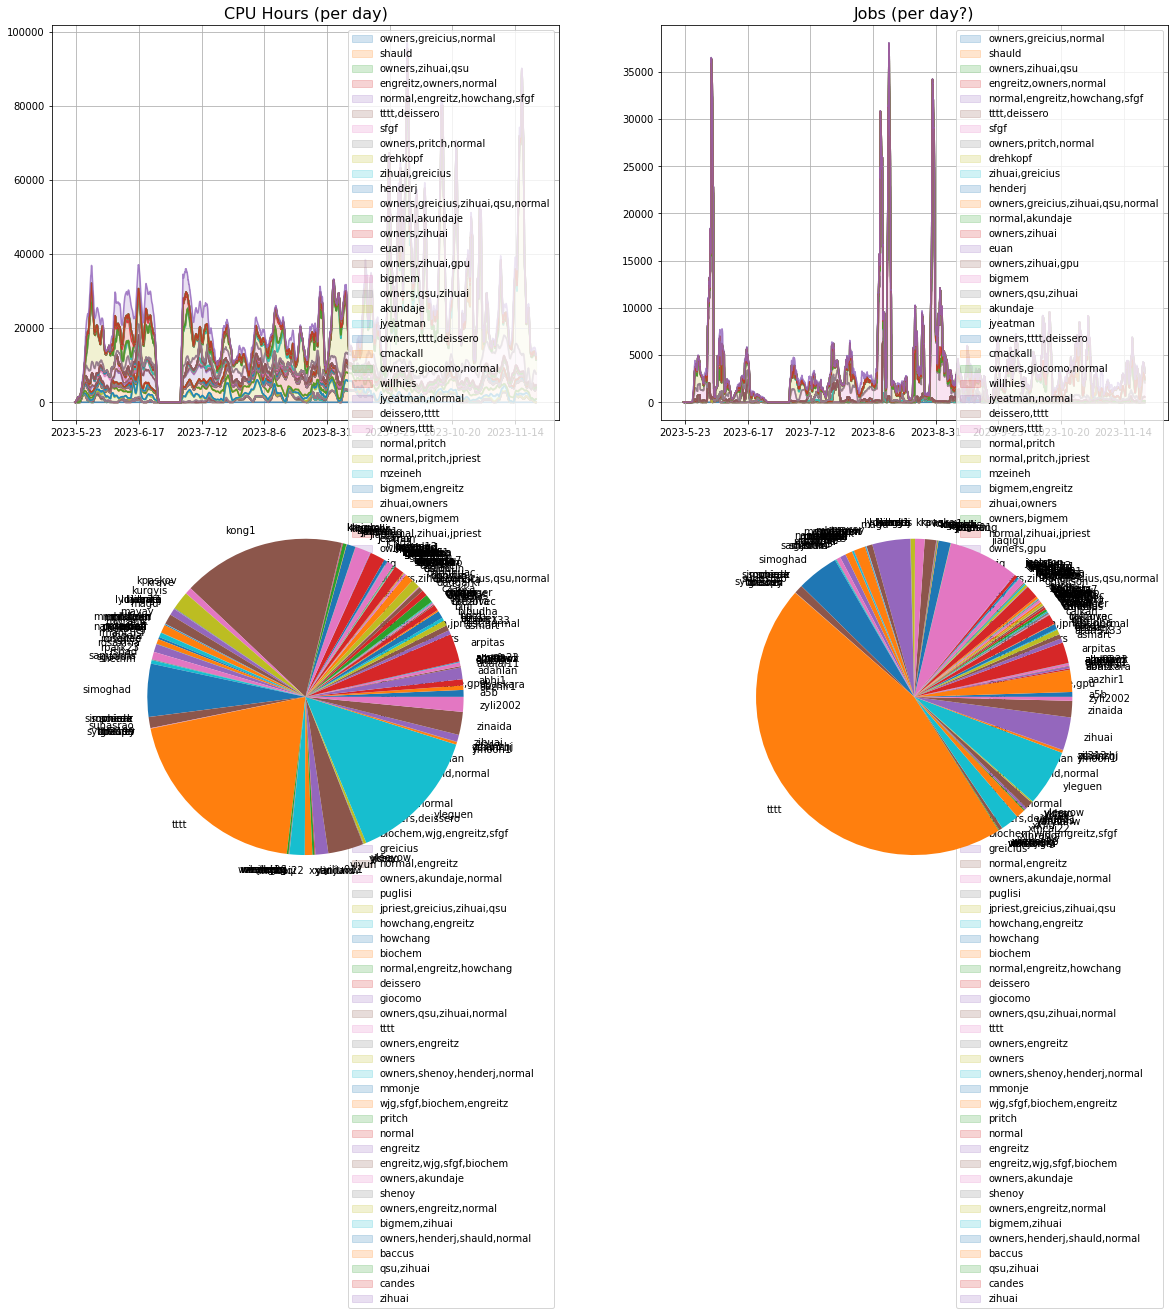

In [67]:
fg = plt.figure(figsize=(20,16))
ax1 = fg.add_subplot(2,2,1)
ax2 = fg.add_subplot(2,2,2)
ax3 = fg.add_subplot(2,2,3)
ax4 = fg.add_subplot(2,2,4)
ax1.grid()
ax2.grid()
#
ax1.set_title('CPU Hours (per day)', size=16)
ax2.set_title('Jobs (per day?)', size=16)
#
cpuh = cpuh_layers['cpu_hours']
jobs = cpuh_layers['jobs']
T = cpuh['time']

print('*** ', cpuh.dtype)
print('*** ', cpuh['time'][0:10])

#
z_cpuh = hpc_lib.plot_layer_cake(data=cpuh, layers=cpuh.dtype.names[1:], time_col='time', ax=ax1)
z_jobs = hpc_lib.plot_layer_cake(data=jobs, layers=cpuh.dtype.names[1:], time_col='time', ax=ax2)
#
# pi charts. left: cpu-hours, right job-time
pi_cpuh = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed']*SACCT_obj['NCPUS'], slice_data=SACCT_obj['User'])
pi_cpuh_lbls = pi_cpuh['name']
pi_cpuh_vls  = pi_cpuh['value']

pi_jobs = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed'], slice_data=SACCT_obj['User'])
pi_jobs_lbls = pi_jobs['name']
pi_jobs_vls  = pi_jobs['value']
#
ax3.pie(pi_cpuh_vls, labels=pi_cpuh_lbls)
ax4.pie(pi_jobs_vls, labels=pi_jobs_lbls)
#
ax1.legend(loc=0)
ax2.legend(loc=0)
#
# fg.canvas.draw()
# for ax in (ax1, ax2):
#     lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text()))) + SACCT_obj.dt_mpd_epoch ) ) 
#              for s in ax.get_xticklabels()]
#     ax.set_xticklabels(lbls)
#fg.canvas.draw()
#lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text())))) ) 
#         for s in ax1.get_xticklabels()]
#ax1.set_xticklabels(lbls)


### SERC GPU activity

In [68]:
# serc_h5 = 'sacct_data/serc_sacct_20211126_20220525.h5'
# SACCT_serc = hpc_lib.SACCT_data_from_h5(serc_h5, keep_raw_data=False, n_cpu=n_cpus)

# serc_gpu_activity = SACCT_serc.active_jobs_cpu(jobs_summary=None, bin_size=1., 
#                                                NCPUs=SACCT_serc.get_NGPUs())

SACCT_serc = SACCT_obj

### GPUs:
For now, hijack the SACCT.get_active_cpus_layer_cake() function, but force the "CPUs" column to use GPUs.

In [69]:
gpu_layers = SACCT_obj.get_active_cpus_layer_cake(layer_field='Account', NCPUs=SACCT_serc.get_NGPUs())

*** DEBUG t_now: 19683.451833011262, t_max: 19683.443703703702


*** keys():  dict_keys(['N_cpu', 'N_jobs'])


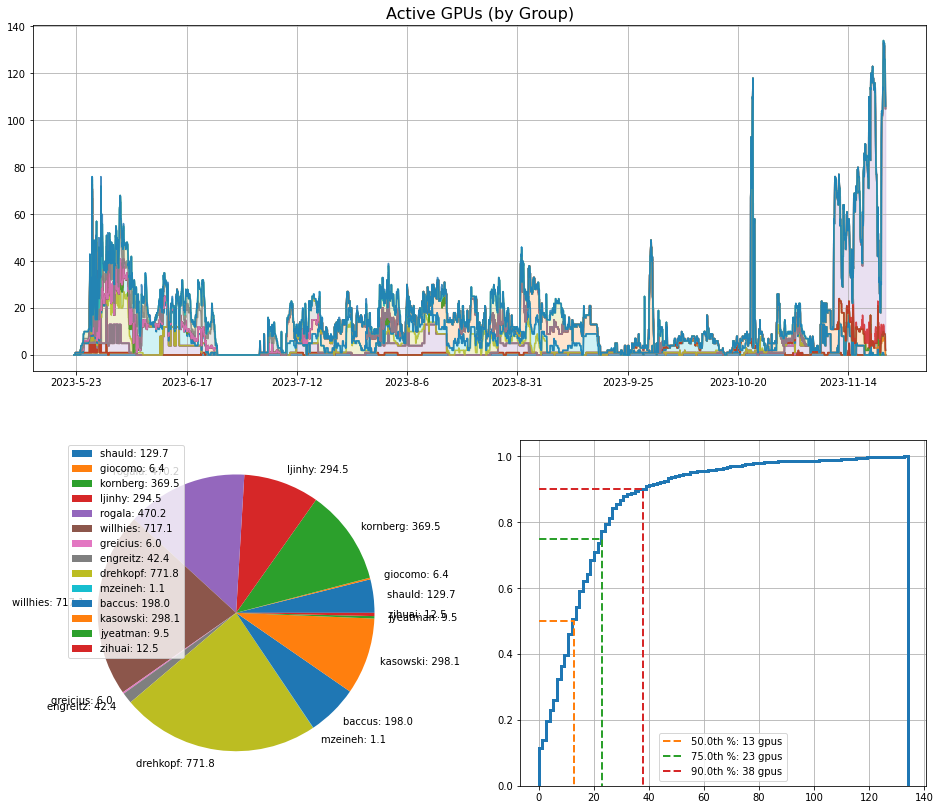

In [70]:
pi_gpu_grps = [s for s in gpu_layers['N_cpu'].dtype.names[1:]]
#print(f'** {pi_gpu_lbls}' )
#
NGPU = SACCT_obj.get_NGPUs()
#
#pi_gpu_vals = numpy.zeros(len(pi_gpu_lbls))
pi_gpu_vals = []
pi_gpu_lbls = []
for k,g in enumerate(pi_gpu_grps):
    ix = SACCT_obj.jobs_summary['Group'].astype(str)==g
    #
    n_gpus = numpy.sum(SACCT_obj.jobs_summary['Elapsed'][ix] * NGPU[ix])
    if n_gpus <= 0.:
        continue
    #
    pi_gpu_vals += [n_gpus]
    pi_gpu_lbls += [f'{g}: {pi_gpu_vals[-1]:.1f}']
#
#print('** vals: ', pi_gpu_vals)
#pi_gpu_lbls = [f'{s}: {v:.1f}' for s,v in zip(pi_gpu_lbls, pi_gpu_vals) ]


fg = plt.figure(figsize=(16,14))
ax1 = fg.add_subplot(2,1,1)
ax2 = fg.add_subplot(2,2,3)
ax3 = fg.add_subplot(2,2,4)
ax1.grid()
#ax2.grid()
ax3.grid()
#
hpc_lib.plot_layer_cake(gpu_layers['N_cpu'], ax=ax1)
z_gpus = ax1.lines[-1].get_ydata()
qs = [.5, .75, .9]
qs_gpu = numpy.quantile(z_gpus, qs)
#
print('*** keys(): ', gpu_layers.keys())
ax2.pie(pi_gpu_vals, labels=pi_gpu_lbls) 
ax2.legend(loc=0)
#
hh_cpus = ax3.hist(z_gpus, bins=100, cumulative=True, density=True, histtype='step', lw=3.)
for x,y in zip(qs_gpu, qs):
    #ax3.plot([0., qs_cpus[-1], qs_cpus[-1]], [qs[-1], qs[-1], 0.], ls='--', color='r', lw=2. )
    ax3.plot([0., x, x], [y, y, 0.], ls='--', lw=2., label=f'{y*100.}th %: {x:.0f} gpus' )

ax1.set_title('Active GPUs (by Group)', size=16)
ax3.legend(loc=0)


In [71]:
print('** ', gpu_layers['N_cpu'].dtype.names)

**  ('time', 'trc', 'shauld', 'giocomo', 'tttt', 'kornberg', 'cmackall', 'mmonje', 'shreyasv', 'ljinhy', 'rogala', 'dpwall', 'willhies', 'greicius', 'engreitz', 'drehkopf', 'mzlin', 'mzeineh', 'baccus', 'kasowski', 'jyeatman', 'zihuai')


In [72]:
cpu_jobs_serc = SACCT_obj.active_jobs_cpu()


In [73]:
serc_cpu_qs = numpy.quantile(cpu_jobs_serc['N_cpu'], [.5, .75, .9])
print('** qs: ', serc_cpu_qs)

** qs:  [ 883.5 1208.  1702. ]


In [74]:
print('*** dtypes...: ', SACCT_obj.jobs_summary.dtype.names)

*** dtypes...:  ('index', 'User', 'Group', 'GID', 'Account', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'ReqMem', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'ReqTRES', 'AllocTRES', 'MaxRSS', 'AveRSS', 'AveVMSize', 'MaxVMSize', 'MaxDiskWrite', 'MaxDiskRead', 'AveDiskWrite', 'AveDiskRead', 'JobID_parent', 'NGPUs')


In [75]:
print('*** ', SACCT_obj['ReqMem'][100:150])

***  [1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11
 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11
 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11
 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11
 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11
 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11 1.28e+11
 1.28e+11 1.28e+11]


**  [0 1 2 3 4 6 8]
***  645470 9892


/tmp/ipykernel_9912/247879298.py:11: RuntimeWarning: divide by zero encountered in divide
  mem_per_cpu = (SACCT_obj['ReqMem'][ix_cpu] / SACCT_obj['NCPUS'][ix_cpu])/10**9


Text(0.5, 1.0, 'ReqMem/GPU')

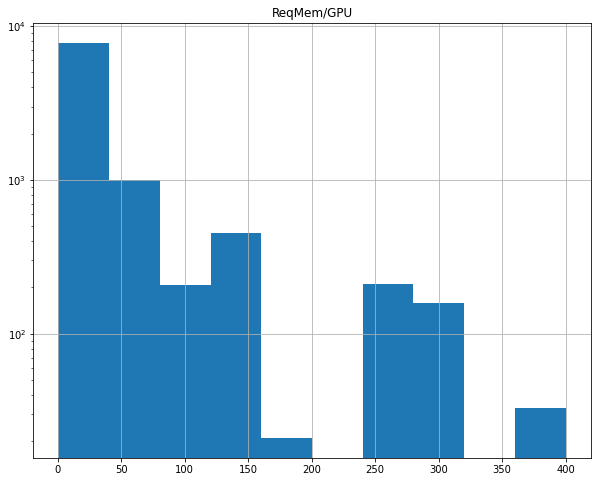

In [76]:
print('** ', numpy.unique(SACCT_obj['NGPUs']))
ix_gpu = SACCT_obj['NGPUs']>0
ix_cpu = numpy.invert(ix_gpu)
#
sacct_gpus = SACCT_obj.jobs_summary[ix_gpu]
#mem_per_gpu= SACCT_server[]
#
print('*** ', len(SACCT_serc.jobs_summary), len(sacct_gpus))
#
mem_per_gpu = (sacct_gpus['ReqMem']/sacct_gpus['NGPUs'])/10**9
mem_per_cpu = (SACCT_obj['ReqMem'][ix_cpu] / SACCT_obj['NCPUS'][ix_cpu])/10**9

req_mem = SACCT_obj['ReqMem']/10**9.
#
fg = plt.figure(figsize=(10,8))
ax1 = fg.add_subplot(1,1,1)
#ax2 = fg.add_subplot(1,2,2)
#
hh_gpu = ax1.hist(mem_per_gpu, bins=10)

##hh_cpu = ax2.hist(mem_per_cpu, bins=20)
#hh_cpu = ax2.hist( (SACCT_obj['ReqMem']/(1024**3)), bins=2)
#
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.grid()
ax2.grid()
#fg.suptitle('Requested Memory', size=16)
ax1.set_title('ReqMem/GPU')

**  [0 1 2 3 4 6 8]
***  645470 9892


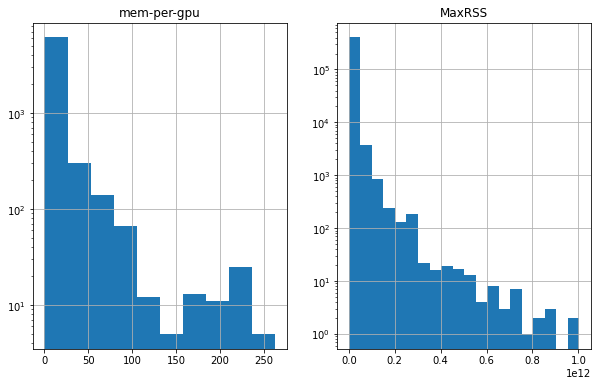

In [77]:
print('** ', numpy.unique(SACCT_obj['NGPUs']))
ix_gpu = SACCT_obj['NGPUs']>0
ix_cpu = numpy.invert(ix_gpu)
#
sacct_gpus = SACCT_obj.jobs_summary[ix_gpu]
#mem_per_gpu= SACCT_server[]
#
print('*** ', len(SACCT_serc.jobs_summary), len(sacct_gpus))
#
mem_per_gpu = (sacct_gpus['MaxRSS']/sacct_gpus['NGPUs'])/10**9
mem_per_cpu = (SACCT_obj['MaxRSS'] / SACCT_obj['NCPUS'])/10**9

req_mem = SACCT_obj['MaxRSS']/1**9.
#
fg = plt.figure(figsize=(10,6))
ax1 = fg.add_subplot(1,2,1)
ax2 = fg.add_subplot(1,2,2)
#
hh_gpu = ax1.hist(mem_per_gpu, bins=10)
ax1.set_yscale('log')
ax2.set_yscale('log')


#hh_cpu = ax2.hist(mem_per_cpu, bins=20)
hh_cpu = ax2.hist(SACCT_obj['MaxRSS'], bins=20)
#
ax1.grid()
ax1.set_title('mem-per-gpu')
ax2.set_title('MaxRSS')
ax2.grid()
#fg.suptitle('MaxRSS', size=16)

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3905: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lbls)


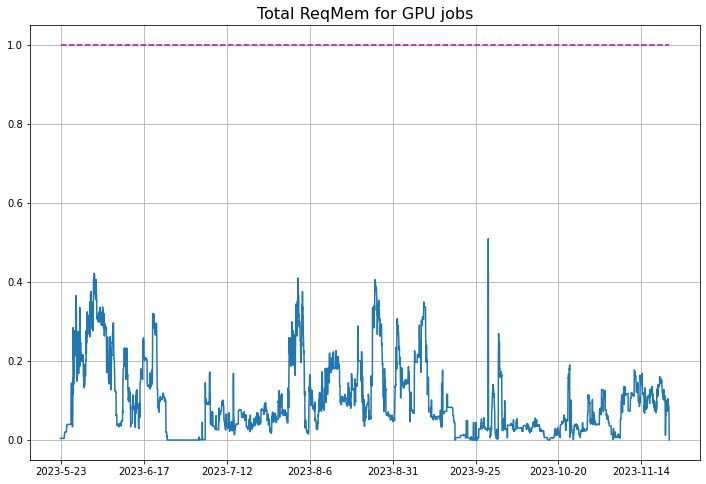

In [78]:
fg = plt.figure(figsize=(12,8))
ax1 = fg.add_subplot(1,1,1)
#
active_req_mem = SACCT_obj.active_jobs_cpu(NCPUs=SACCT_obj['ReqMem'][ix_gpu], jobs_summary=SACCT_obj.jobs_summary[ix_gpu])
ARM = active_req_mem
#
total_mem = 10*1024*1024**3 + 2*192*1024**3
#total_mem = 10*1024*10**9 + 2*192*10**9
#
ax1.plot(ARM['time'], ARM['N_cpu']/total_mem, ls='-')
#
#ax1.plot(ARM['time'][0::len(ARM['time'])-1], numpy.ones(2)*total_mem, ls='--', color='m')
ax1.plot(ARM['time'][0::len(ARM['time'])-1], numpy.ones(2), ls='--', color='m')
ax1.grid()
ax1.set_title('Total ReqMem for GPU jobs', size=16)
lbls = hpc_lib.fg_time_labels_to_dates(ax1)

In [59]:
print('** ', active_req_mem.dtype)

**  [('time', '>f8'), ('N_jobs', '>f8'), ('N_cpu', '>f8')]


### Some Seasonality reports:
NOTE: Some reports being moved to hpc_reports module.

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:1501: UserWarning: FixedFormatter should only be used together with FixedLocator
  tmp_x = ax.set_xticklabels(['', *[str(int((x%24)/daily_Period) ) for x in ax.get_xticks()[1:]]])


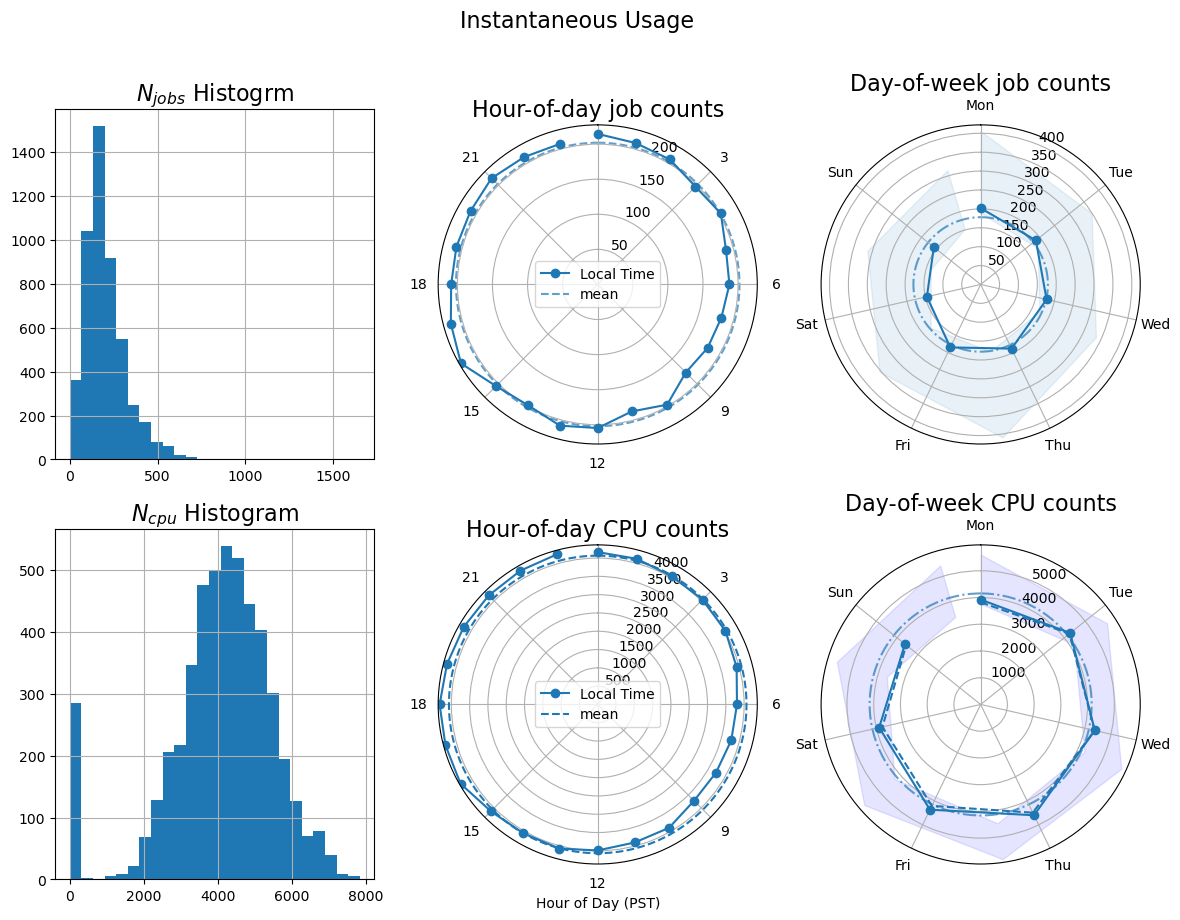

In [60]:
cpu_seasonality = SACCT_obj.active_cpu_jobs_per_day_hour_report(qs=[.45, .5, .9], periodic_projection='polar')

In [61]:
SACCT_rep = hpc_reports.SACCT_report_handler(SACCT_obj=SACCT_obj, Short_title='SERC, 2023-4',
                                Full_title="SERC HPC Analytics, April 2023", out_path='output/SERC_202304',
                                            )

In [28]:
zz = SACCT_rep.cpu_hourly_activity_report()

NameError: name 'SACCT_rep' is not defined

In [63]:
print(mem_per_cpu[0:500])

[6.67443333e-02 5.23590000e-02 5.79260000e-02 5.20320000e-02
 6.68625833e-02 5.26100000e-02 5.20300000e-02 5.26050000e-02
 5.21620000e-02 5.23910000e-02 5.23140000e-02 5.21040000e-02
 5.21390000e-02 5.27900000e-02 6.12850000e-02 1.10933918e+01
 1.41850423e+01 1.10858370e+01 1.10150253e+01 1.17398500e-02
 6.62319583e-02 1.16448490e+00 3.34070000e-02 3.84695000e-02
 2.97025000e-02 3.20145000e-02 6.30000000e-05 8.54926638e+00
 9.34350844e+00 4.56282981e+00 6.74957083e-02 8.54407625e-01
 1.55267913e+00 8.55673500e-01 8.62691000e-01 8.61457625e-01
 8.56858875e-01 8.66410375e-01 4.98094400e-01 5.81785000e-01
 5.79658000e-01 5.79659000e-01 5.79461000e-01 5.79440000e-01
 5.79436000e-01 5.79440000e-01 5.79337000e-01 5.81672000e-01
 5.79237000e-01 5.79233000e-01 5.80625000e-01 5.81349000e-01
 5.80213000e-01 9.42515000e-02 5.82824000e-01 5.13976500e-01
 1.27404000e-02 1.15817500e-02 1.54300000e-03 4.16157382e+00
 3.39784591e+00 6.61717083e-02 4.68854335e+01 8.68591030e+01
 4.21021450e+00 6.674995

##  A Group report:
- specify group; all partitions.
- This is nominally (a version of) a standard report we might run for a PI group -- or at least this is how we produce the SACCT_obj for that group).

In [64]:
grp_group='oneillm'
grp_partition=None
SACCT_obj_grp = hpc_lib.SACCT_data_direct(group=grp_group, partition=grp_partition, start_date=str(start_date),
                                          n_cpu=n_cpus, verbose=verbose, delim=delim_sacct,
                                          end_date=str(end_date), keep_raw_data=False)

***  2023-05-18 00:00:00+00:00 <class 'datetime.datetime'> 2023-11-14 00:00:00+00:00 <class 'datetime.datetime'>
*** DEBUG: Now execute load_sacct_data(); options_str= --group=oneillm  --delimiter="*" 
*** DEBUG: load_sacct_data() executed. Compute calc_jobs_summary()
*** DEBUG: data stuff:  16731 (numpy.record, [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('ReqMem', '<f8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'O'), ('Suspended', 'O'), ('ReqTRES', 'O'), ('AllocTRES', 'O'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDiskRead', '<f8'), ('JobID_parent', 'O'

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3309: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3131: RuntimeWarning: All-NaN slice encountered
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3131: RuntimeWarning: invalid value encountered in cast
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\


*** DEBUG t_now: 19674.464685664432, t_max: 19674.45658564815


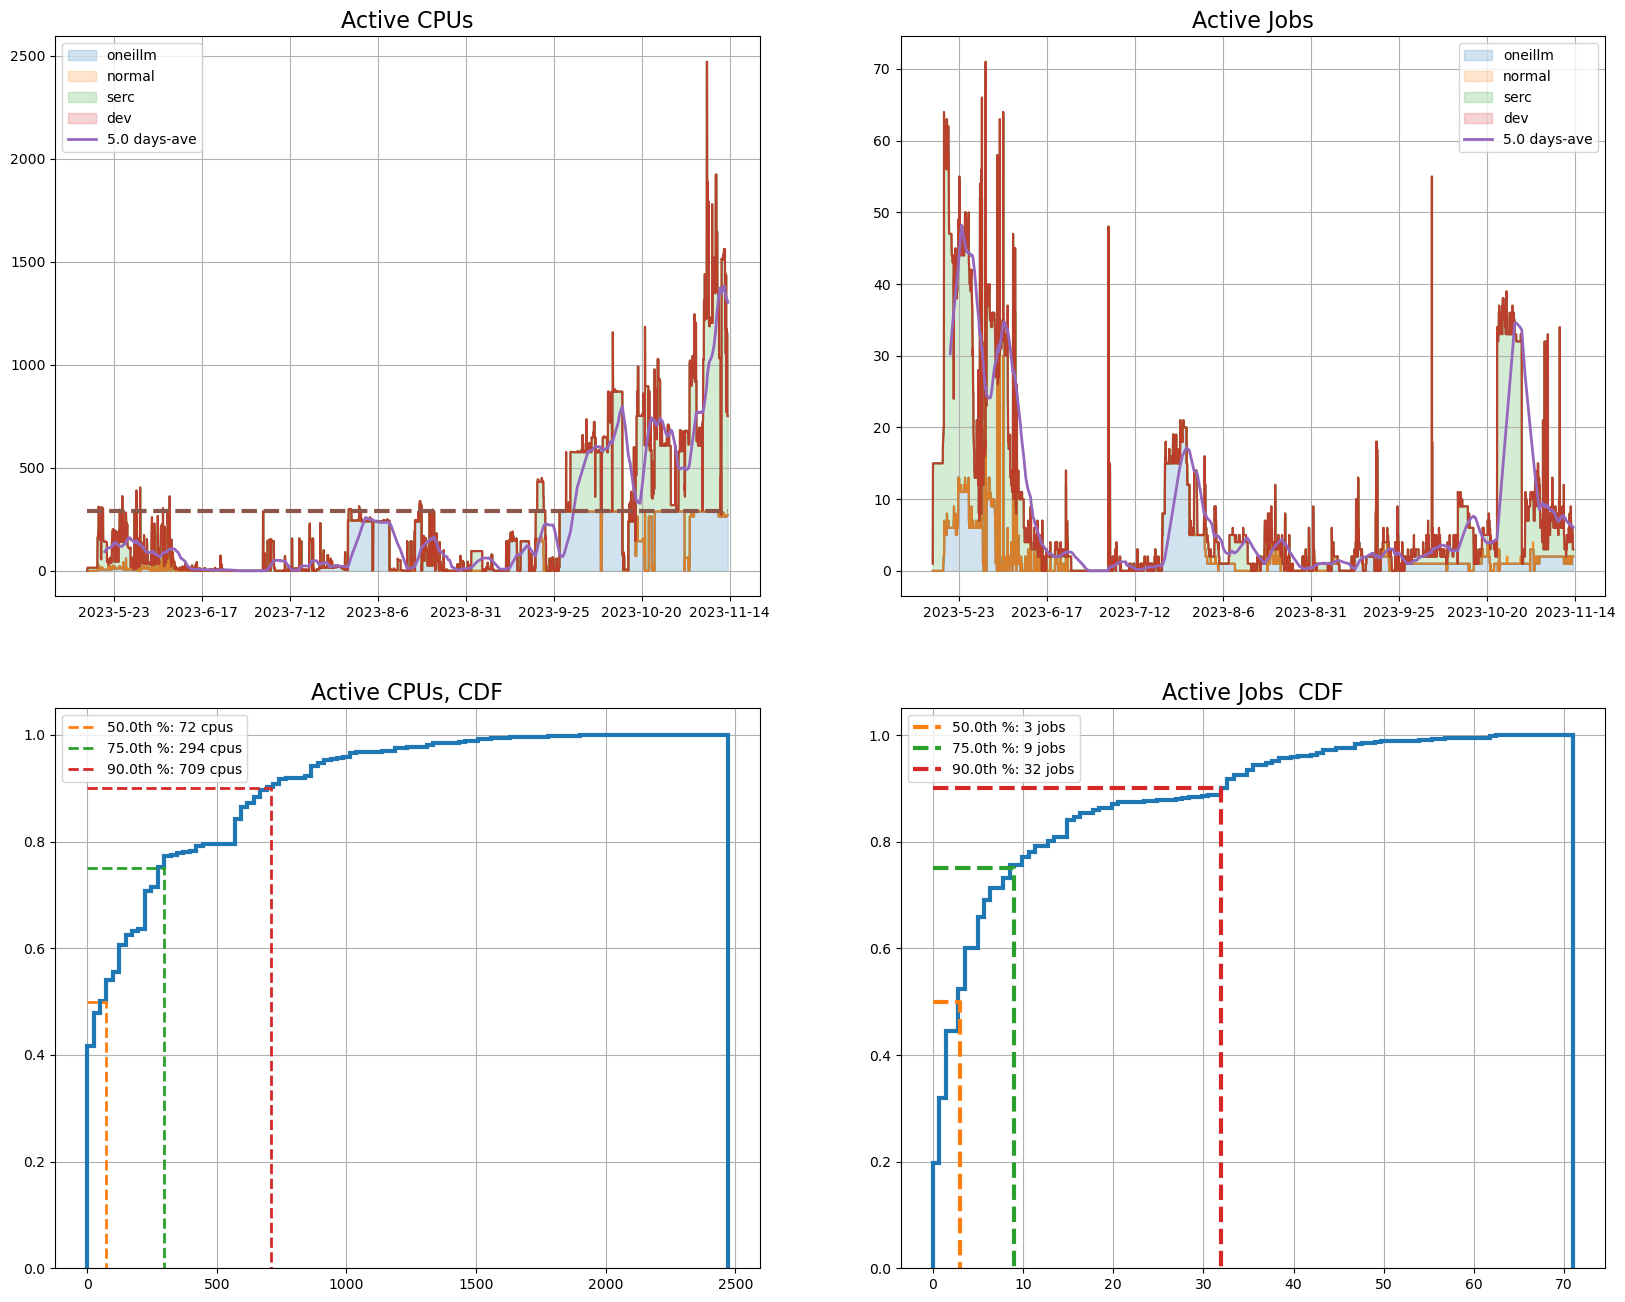

In [65]:
fg_cpu_lc_acct = SACCT_obj_grp.report_activecpus_jobs_layercake_and_CDFs(group_by='Partition')

ax = fg_cpu_lc_acct.axes[0]
ln_ = ax.lines[0]
X = ln_.get_xdata()
#
ax.plot(X[0::(len(X)-1)], (12*24)*numpy.ones(2), ls='--', lw=3)

In [66]:
grp_group='gorelick'
grp_partition=None
SACCT_obj_grp = hpc_lib.SACCT_data_direct(group=grp_group, partition=grp_partition, start_date=str(start_date),
                                          n_cpu=n_cpus, verbose=verbose, delim=delim_sacct,
                                          end_date=str(end_date), keep_raw_data=False)

***  2023-05-18 00:00:00+00:00 <class 'datetime.datetime'> 2023-11-14 00:00:00+00:00 <class 'datetime.datetime'>
*** DEBUG: Now execute load_sacct_data(); options_str= --group=gorelick  --delimiter="*" 
*** DEBUG: load_sacct_data() executed. Compute calc_jobs_summary()
*** DEBUG: data stuff:  3783758 (numpy.record, [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('ReqMem', '<f8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'O'), ('Suspended', 'O'), ('ReqTRES', 'O'), ('AllocTRES', 'O'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDiskRead', '<f8'), ('JobID_parent', 

/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3309: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3131: RuntimeWarning: invalid value encountered in cast
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3131: RuntimeWarning: All-NaN slice encountered
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3309: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3131: RuntimeWarning: All-NaN slice encountered
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/users/myoder96/Codes/HPC_analytics/hpc_lib.py:3131: RuntimeWarning: invalid value encountered in cast
  ('NTasks',    'NTasks', l

*** DEBUG t_now: 19674.476288986098, t_max: 19674.07144675926


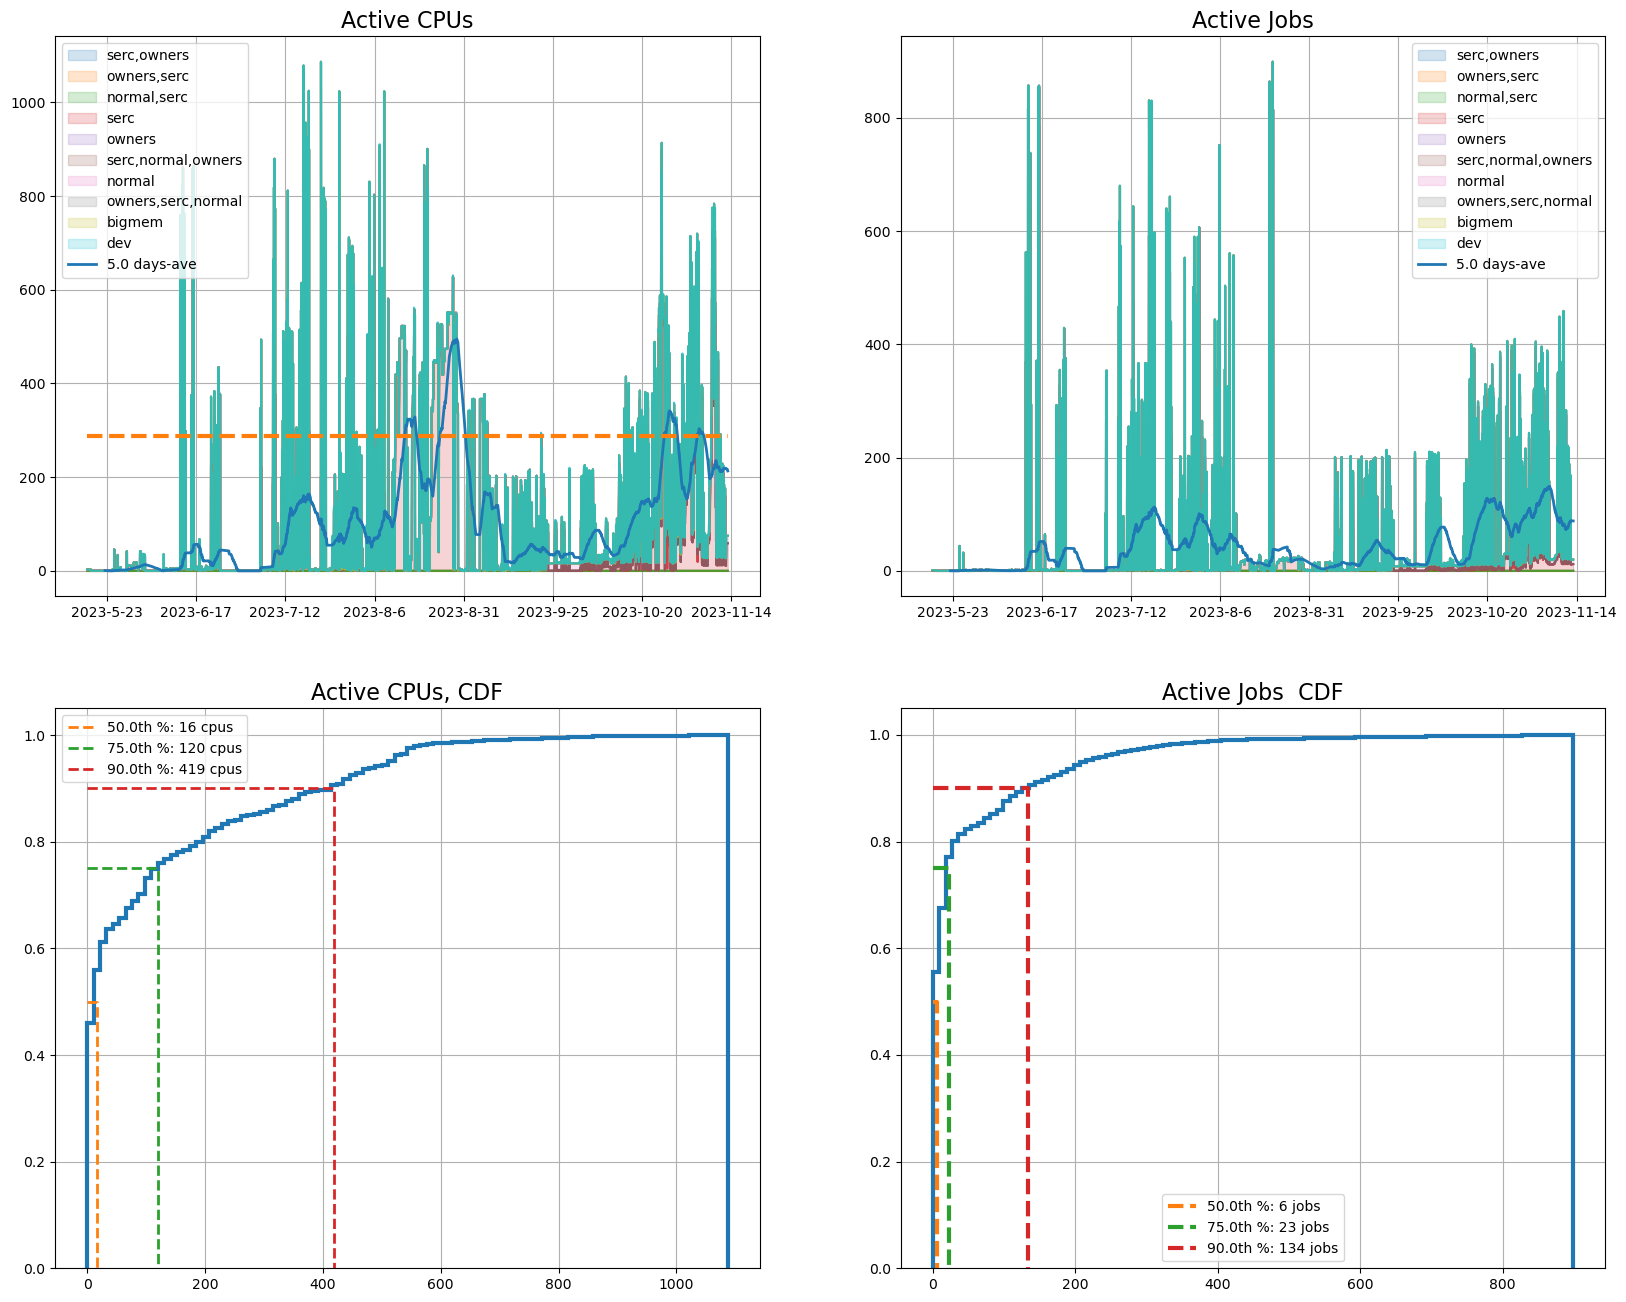

In [67]:
fg_cpu_lc_acct = SACCT_obj_grp.report_activecpus_jobs_layercake_and_CDFs(group_by='Partition')

ax = fg_cpu_lc_acct.axes[0]
ln_ = ax.lines[0]
X = ln_.get_xdata()
#
ax.plot(X[0::(len(X)-1)], (12*24)*numpy.ones(2), ls='--', lw=3)

Text(0.5, 0, '$MaxRSS/ReqMEM$')

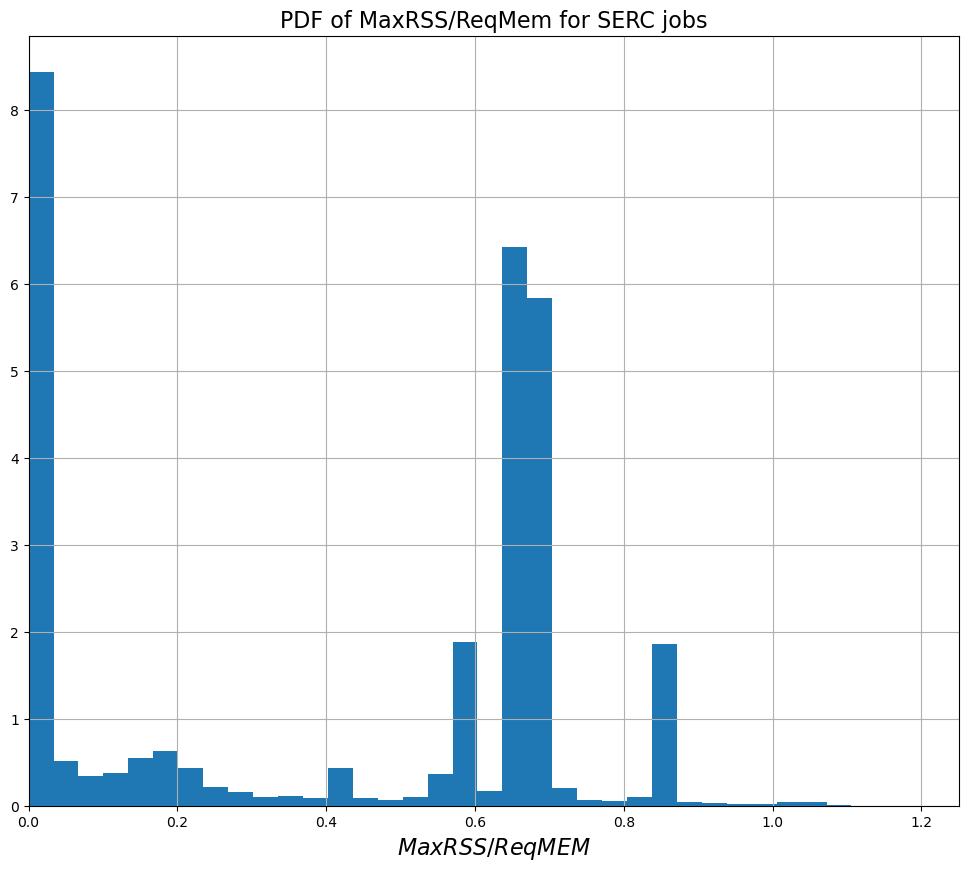

In [68]:
fg = plt.figure(figsize=(12,10))
ax = fg.add_subplot(1,1,1)
#
zz = ax.hist(SACCT_obj['MaxRSS']/SACCT_obj['ReqMem'], bins=100, density=True)
ax.set_xlim(0., 1.25)
ax.grid()
ax.set_title('PDF of MaxRSS/ReqMem for SERC jobs', size=16)
ax.set_xlabel('$MaxRSS/ReqMEM$', size=16)

In [69]:
print('** ', SACCT_obj['ReqMem'][0:20])
print('** ', SACCT_obj['MaxRSS'][0:20])

**  [5.00e+10 2.00e+09 2.00e+09 2.00e+09 5.00e+10 2.00e+09 2.00e+09 2.00e+09
 2.00e+09 2.00e+09 2.00e+09 2.00e+09 2.00e+09 2.00e+09 2.00e+09 1.28e+11
 1.28e+11 1.28e+11 1.28e+11 1.60e+11]
**  [1.6018640e+09 5.2359000e+07 5.7926000e+07 5.2032000e+07 1.6047020e+09
 5.2610000e+07 5.2030000e+07 5.2605000e+07 5.2162000e+07 5.2391000e+07
 5.2314000e+07 5.2104000e+07 5.2139000e+07 5.2790000e+07 6.1285000e+07
 9.9840526e+10 9.9295296e+10 9.9772533e+10 9.9135228e+10 2.3479700e+08]
